# Auto-Sklearn
Auto-sklearn is an open-source Python tool that automatically determines effective machine learning pipelines for classification and regression datasets. It is built around the successful scikit-learn library and won the recent AutoML challenge

## Install Libraries

In [16]:
!sudo apt-get install build-essential swig


!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   201  100   201    0     0   3722      0 --:--:-- --:--:-- --:--:--  3722


## Load Libaries

In [0]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

## Load Dataset

In [0]:
data = pd.read_csv('diabetes.csv')

In [0]:
data.head()

In [0]:
data.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Train_test Split

In [0]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

## Import Autosklearn library and create object out of it

In [0]:
import autosklearn.classification

In [0]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120, per_run_time_limit=30, n_jobs=2,
    include_estimators=["random_forest", "sgd", ], exclude_estimators=None, include_preprocessors=["no_preprocessing", ], exclude_preprocessors=None)

In [24]:
automl.fit(X_train, y_train)   

[WARNING] [2020-05-31 13:10:52,228:smac.runhistory.runhistory.RunHistory] Encountered exception Expecting ',' delimiter: line 386 column 12 (char 8197) while reading runhistory from /tmp/autosklearn_tmp_123_5735/smac3-output/run_1872583848/runhistory.json. Not adding any runs!


AutoSklearnClassifier(delete_output_folder_after_terminate=False,
                      delete_tmp_folder_after_terminate=False,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=['random_forest', 'sgd'],
                      include_preprocessors=['no_preprocessing'],
                      initial_configurations_via_metalearning=25,
                      logging_config=None, max_models_on_disc=50,
                      metadata_directory=None, ml_memory_limit=3072, n_jobs=2,
                      output_folder=None, per_run_time_limit=30,
                      resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      shared_mode=False, smac_scenario_args=None,
        

In [26]:
automl.cv_results_

{'budgets': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'mean_fit_time': array([0.34886003, 1.81622887, 1.74655056, 0.41157484, 0.36479282,
        1.73419452, 1.83655095, 1.78247213, 1.72131705, 2.19374824,
        0.27487731, 0.52714658, 0.26303458, 1.92882371, 2.06343627,
        2.5955472 , 0.48515201, 0.26524425, 1.6947479

## Show Models

In [25]:
print(automl.show_models())

[(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'sgd', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:sgd:alpha': 7.377362017615033e-06, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'invscaling', 'classifier:sgd:loss': 'modified_huber', 'classifier:sgd:penalty': 'l1', 'classifier:sgd:tol': 1.3522517616467241e-05, 'classifier:sgd:epsilon': 0.00020765388591949653, 'classifier:sgd:eta0': 0.032593418670531525, 'classifier:sgd:power_t': 0.5887287649094725},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': F

## Best parameters out of it

In [27]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 3589f38ae6264b3c9989f41313b3f828
  Metric: accuracy
  Best validation score: 0.816754
  Number of target algorithm runs: 102
  Number of successful target algorithm runs: 102
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [28]:
automl.cv_results_['params'][np.argmax(automl.cv_results_['mean_test_score'])]

{'balancing:strategy': 'none',
 'classifier:__choice__': 'sgd',
 'classifier:sgd:alpha': 7.377362017615033e-06,
 'classifier:sgd:average': 'True',
 'classifier:sgd:epsilon': 0.00020765388591949653,
 'classifier:sgd:eta0': 0.032593418670531525,
 'classifier:sgd:fit_intercept': 'True',
 'classifier:sgd:learning_rate': 'invscaling',
 'classifier:sgd:loss': 'modified_huber',
 'classifier:sgd:penalty': 'l1',
 'classifier:sgd:power_t': 0.5887287649094725,
 'classifier:sgd:tol': 1.3522517616467241e-05,
 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding',
 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense',
 'data_preprocessing:numerical_transformer:imputation:strategy': 'median',
 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax',
 'feature_preprocessor:__choice__': 'no_preprocessing'}

## Making predictions

In [0]:
predictions = automl.predict(X_test)

## Check performance

In [30]:
import sklearn.metrics
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.7291666666666666


## Dump the file 

In [0]:
import pickle
x = automl.show_models()
results = {"ensemble": x}
pickle.dump(results, open('diabetes.pickle','wb'))

In [33]:
!ls *.pickle

churn.pickle  diabetes.pickle


## Check performance

In [34]:
np.bincount(predictions)

array([129,  63])

In [35]:
np.bincount(y_test)

array([125,  67])

In [36]:
max(y_test.mean(), 1 - y_test.mean())

0.6510416666666667

In [37]:
print(sklearn.metrics.confusion_matrix(y_test, predictions))

[[101  24]
 [ 28  39]]


In [0]:
import seaborn as sn
import matplotlib.pyplot as plt

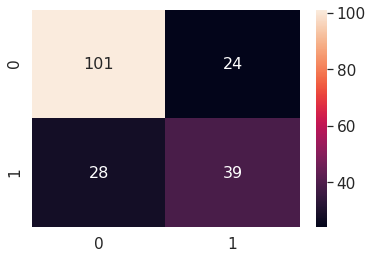

In [39]:
sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predictions)), annot=True, annot_kws={"size": 16}, fmt='')
plt.show()

In [40]:
print(sklearn.metrics.precision_score(y_test, predictions))

0.6190476190476191


What percentage of users that end up diabestes does the algorithm successfully find?

In [42]:
print(sklearn.metrics.recall_score(y_test, predictions))

0.582089552238806
